# Analyzing cross-species similarity of transcriptional embeddings

This notebook demonstrates how to perform cross-species similarity analysis of transcriptional embeddings.

- The aim of this experiment is to explore the cross-species homology of region-specific gene expression patterns.
- Here we first applied the trained models to region-averaged gene expression data from publicly available [mouse spatial transcriptomics resources](https://www.science.org/doi/full/10.1126/sciadv.abb3446) and then quantitatively evaluated cross-species matching performance by assessing their [similarity ranks](https://elifesciences.org/articles/79418) among all human cortical ROIs.

### Data

- Human and Mouse transcriptional embeddings generated from trained detached models ([link](https://github.com/ibpshangzheng/transbrain/tree/main/tutorials/tr_embeddings/FinalModels))


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,Normalize
import matplotlib.colors as mcolors
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
font_path ='../../whitney-medium.otf'
custom_font = FontProperties(fname=font_path)
from matplotlib.patches import Rectangle

In [3]:
jet_cmap = plt.get_cmap('RdYlBu_r')
new_colors1 = [jet_cmap(i) for i in np.linspace(0, 0.3, 256)]
new_colors2 = [jet_cmap(i) for i in np.linspace(0.3, 1, 256)]
new_colors = new_colors1+new_colors2
custom_jet_cmap = LinearSegmentedColormap.from_list('custom_jet', new_colors, N=256)

In [4]:
mouse_select_cortex_region = ['ACAd', 'ACAv', 'PL','ILA', 'ORBl', 'ORBm', 'ORBvl','MOs','MOp','SSp-n', 'SSp-bfd', 'SSp-ll', 'SSp-m',
       'SSp-ul', 'SSp-tr', 'SSp-un','SSs','PTLp','RSPagl','RSPd', 'RSPv','VISp','VISal','VISl','VISpl','VISam','VISpm','AId','AIp','AIv','GU','VISC','TEa', 'PERI', 'ECT','AUDd', 'AUDp',
       'AUDpo', 'AUDv']

## Human Autocorrelation Matrix

Load human transcriptional embeddings from DNN model

In [5]:
cortical_embeddings_path = '../../tr_embeddings/FinalModels/MixData_Cortical_Train_Repeat1000/*/*/*'

In [6]:
subcortical_embeddings_path = '../../tr_embeddings/FinalModels/MixData_SubCortical_Train_Repeat1000/*/*/*'

In [7]:
H_cortical_corr = []
for path in tqdm(glob.glob(cortical_embeddings_path)):
    human_cortical_emb = pd.read_csv(os.path.join(path,'Human_Cortical_Embedding.csv'))
    human_cortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(human_cortical_emb.values)
    H_cortical_corr.append(corr_)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:35<00:00, 27.87it/s]


In [8]:
H_cortical_corr_mean =  pd.DataFrame(np.mean(H_cortical_corr,axis=0),index = human_cortical_emb.index.values,columns = human_cortical_emb.index.values)

Visualizing human cortical autocorrelation matrix

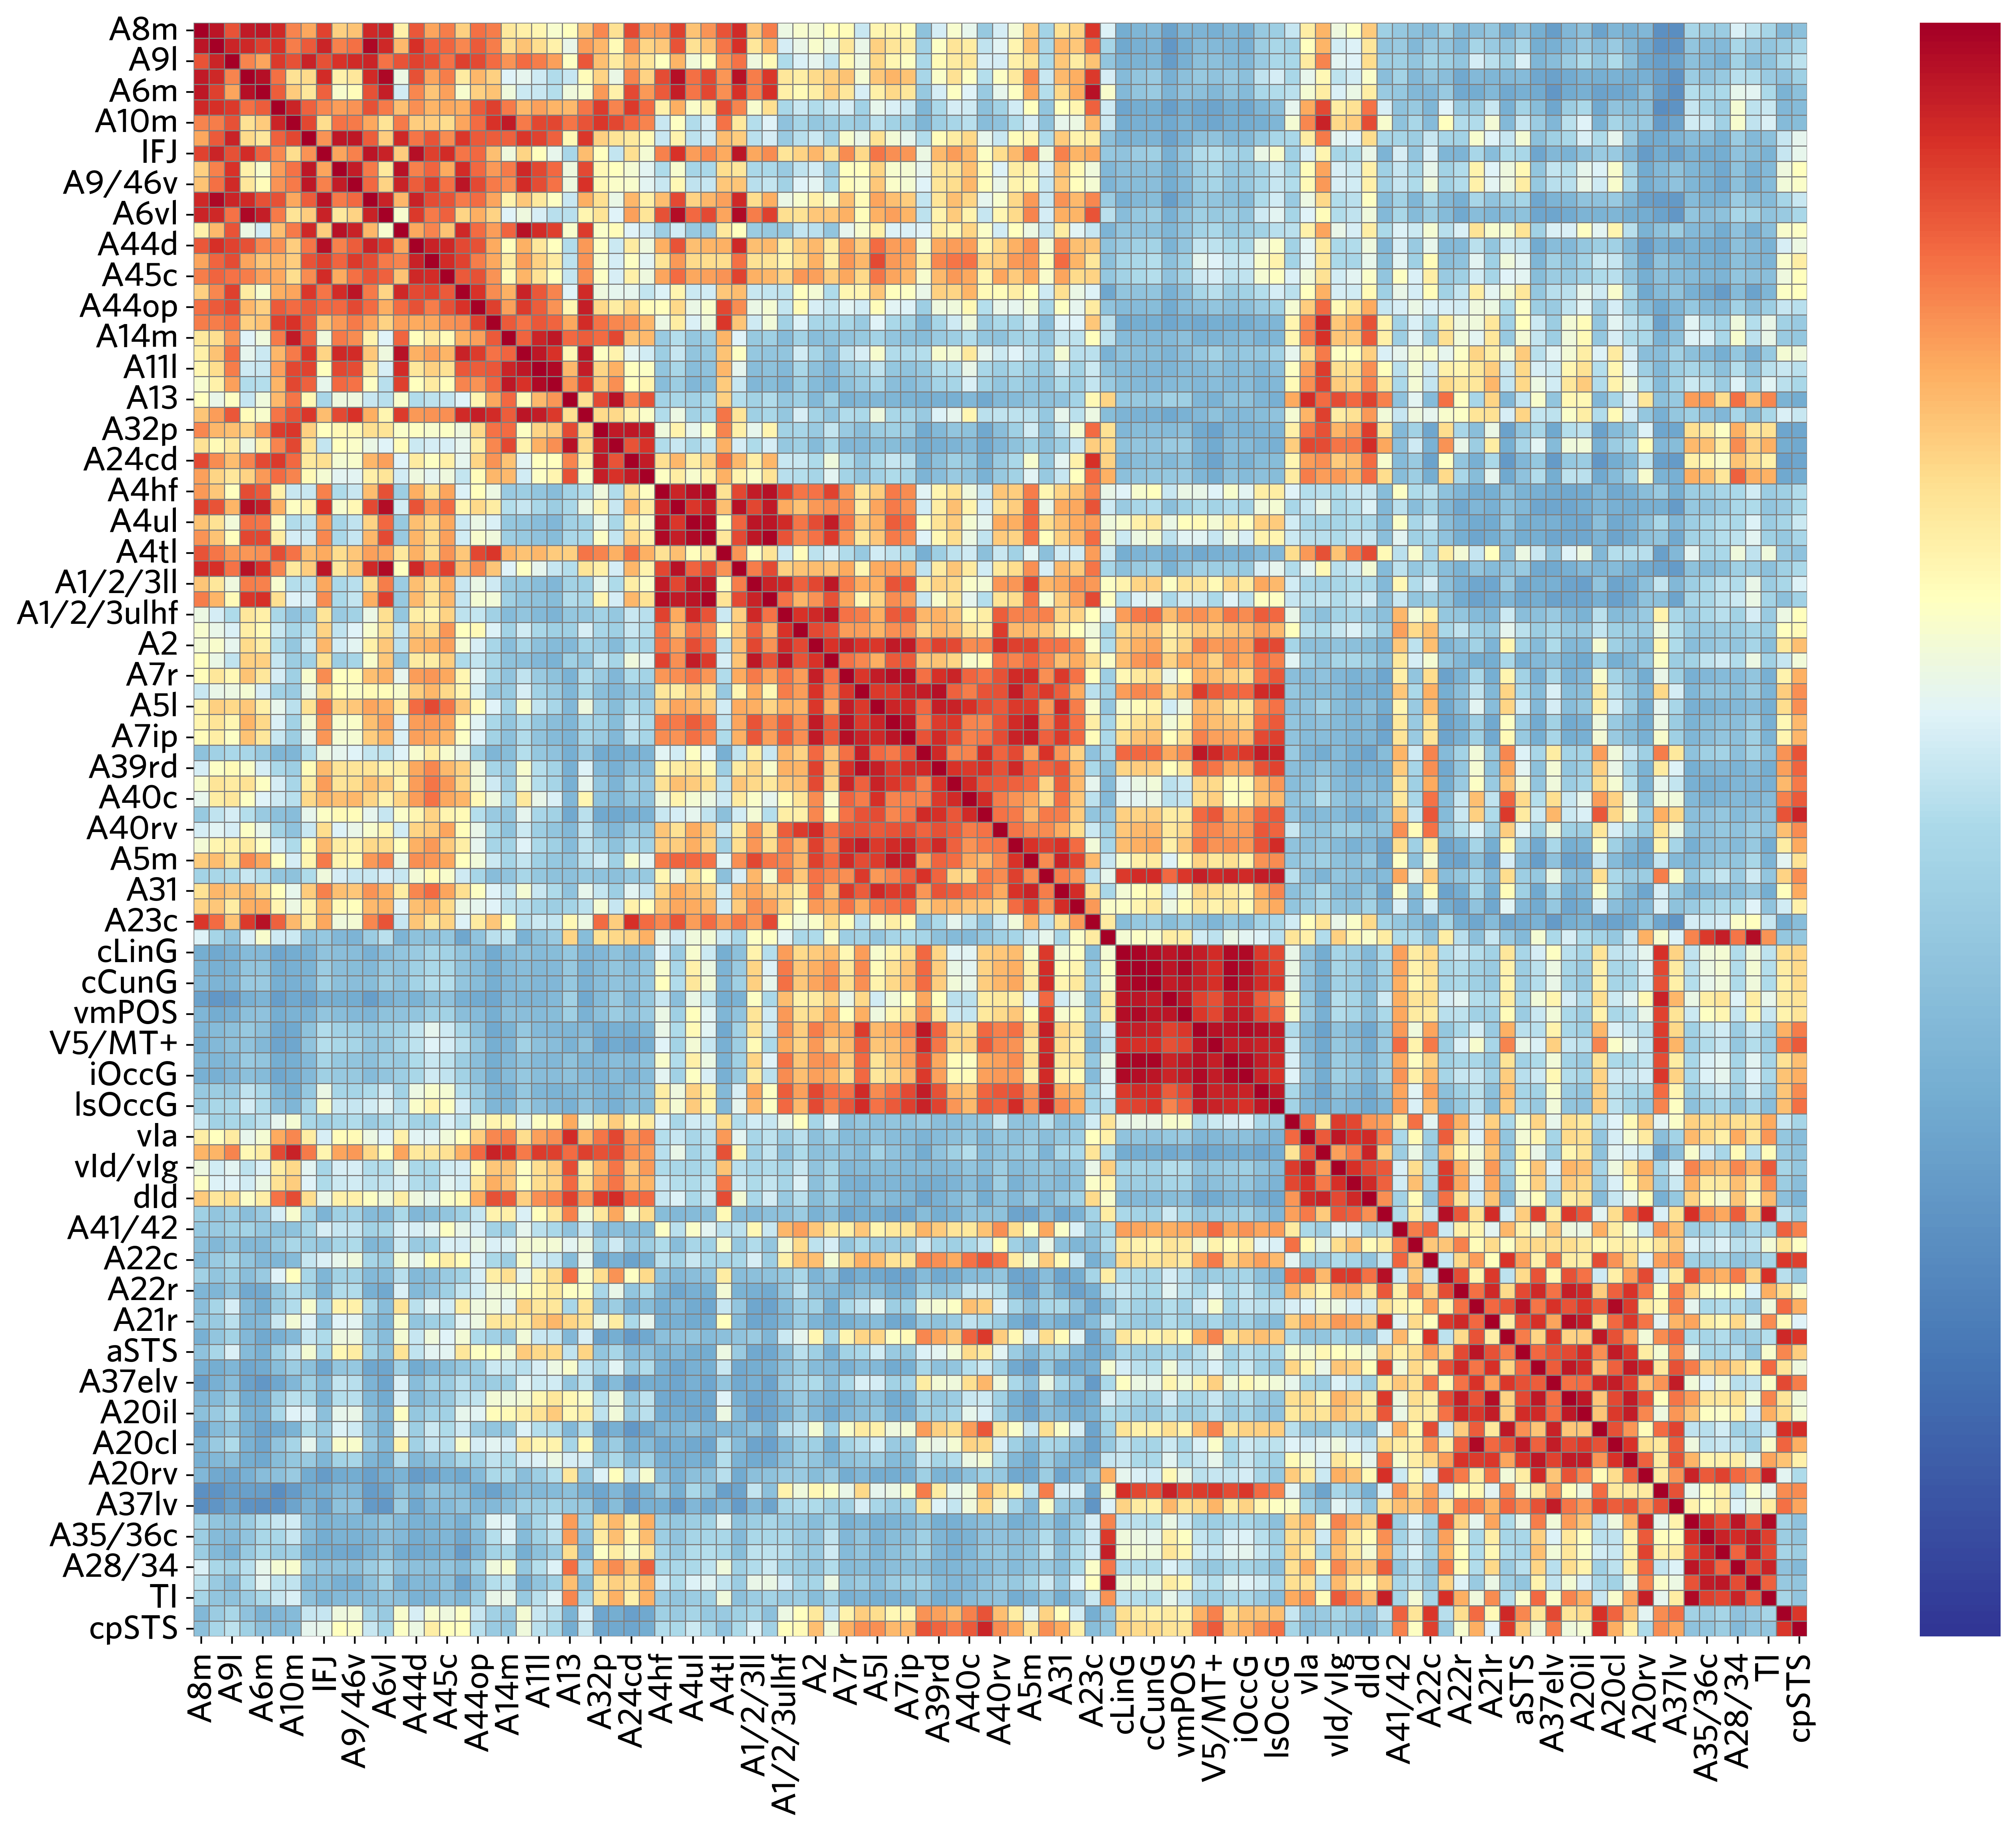

In [9]:
plt.figure(figsize=(15, 12),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(H_cortical_corr_mean,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=True,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,106,2)],rotation=90,fontproperties=custom_font,size=16)
plt.yticks([i+0.5 for i in range(0,106,2)],rotation=0,fontproperties=custom_font,size=16)
plt.tight_layout()

Load human subcortical embeddings

In [10]:
H_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embeddings_path)):
    human_subcortical_emb = pd.read_csv(os.path.join(path,'Human_SubCortical_Embedding.csv'))
    human_subcortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(human_subcortical_emb.values)
    H_subcortical_corr.append(corr_)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:31<00:00, 31.73it/s]


In [11]:
H_subcortical_corr_mean = pd.DataFrame(np.mean(H_subcortical_corr,axis=0),index = human_subcortical_emb.index.values,columns = human_subcortical_emb.index.values)

Visualizing human subcortical autocorrelation matrix

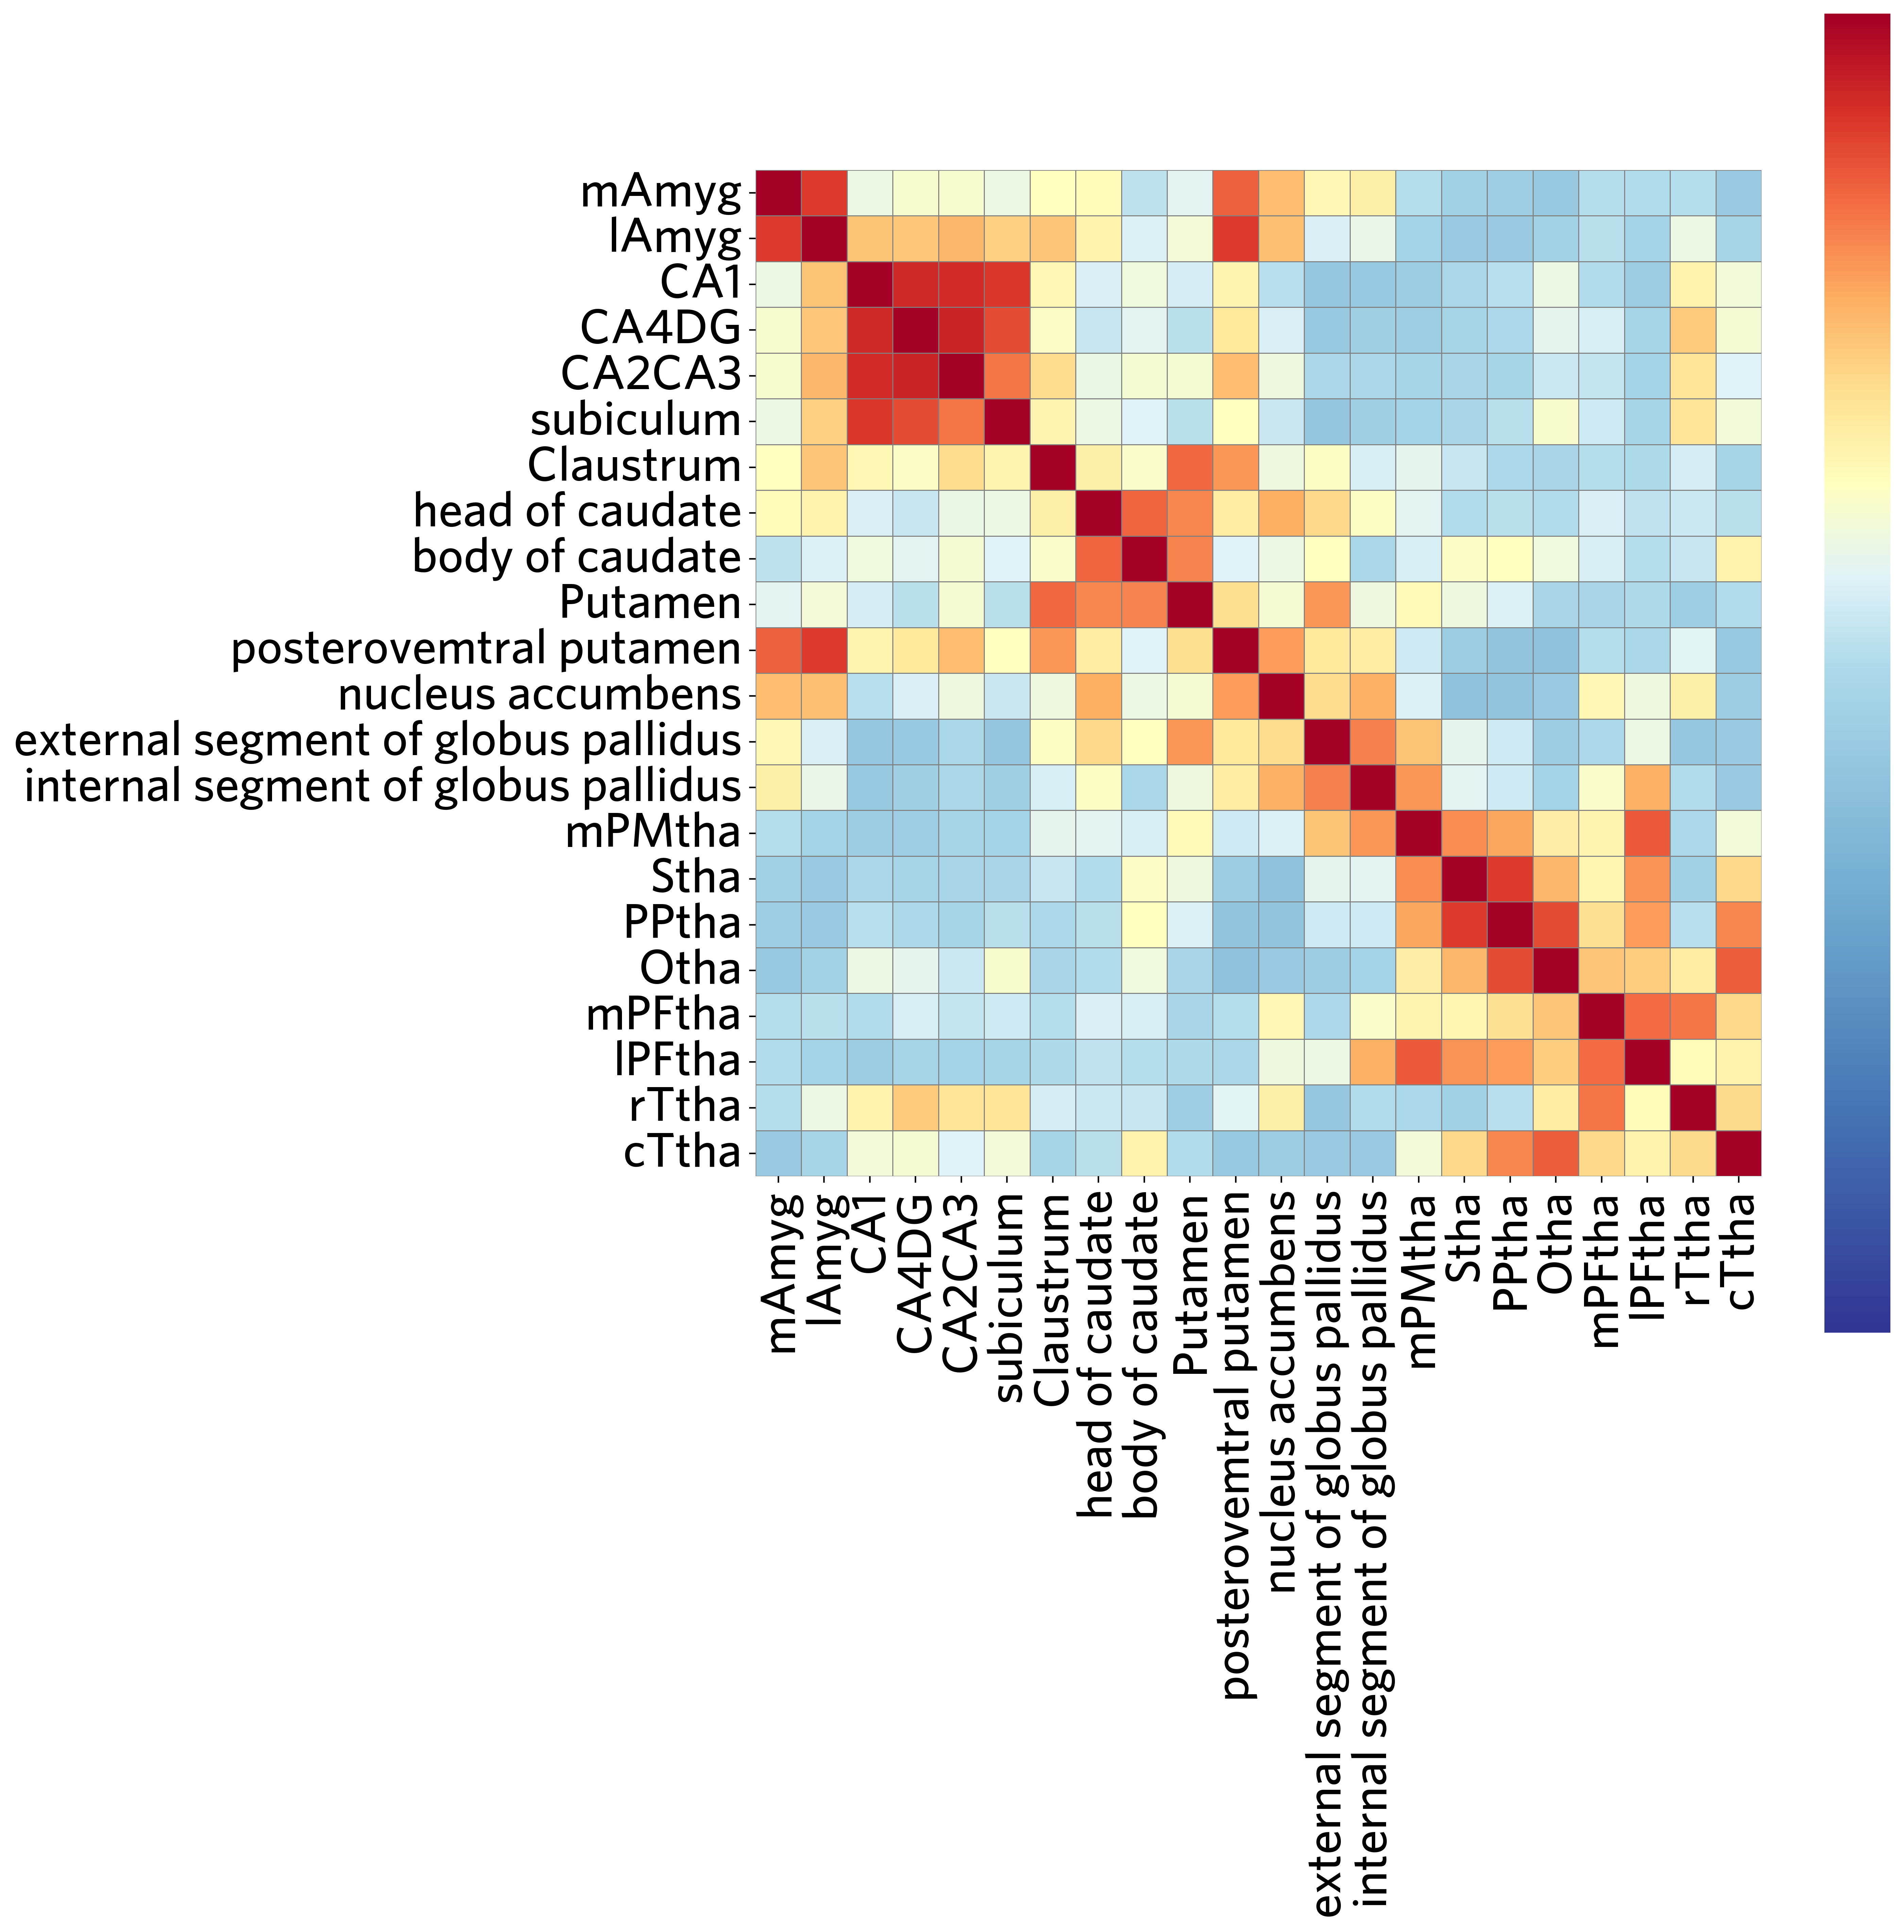

In [12]:
plt.figure(figsize=(15, 15),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(H_subcortical_corr_mean,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=True,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,22,1)],rotation=90,fontproperties=custom_font,size=26)
plt.yticks([i+0.5 for i in range(0,22,1)],rotation=0,fontproperties=custom_font,size=26)
plt.tight_layout()

## Cross-species Similarity Matrix

Load cross-species cortical embeddings

In [13]:
HM_cortical_corr = []
for path in tqdm(glob.glob(cortical_embeddings_path)):
    human_cortical_emb = pd.read_csv(os.path.join(path,'Human_Cortical_Embedding.csv'))
    mouse_cortical_emb = pd.read_csv(os.path.join(path,'Mouse_Cortical_Embedding.csv'))
    human_cortical_emb.set_index('index',inplace = True,drop = True)
    mouse_cortical_emb.set_index('index',inplace = True ,drop=True)
    corr_ = np.corrcoef(human_cortical_emb.values,mouse_cortical_emb.values)[:105,105:]
    HM_cortical_corr.append(corr_)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:53<00:00, 18.81it/s]


In [14]:
HM_cortical_corr_mean = pd.DataFrame(np.mean(HM_cortical_corr,axis=0),index = human_cortical_emb.index.values,columns = mouse_cortical_emb.index.values)

In [15]:
HM_cortical_corr_mean = HM_cortical_corr_mean[mouse_select_cortex_region]

Visualizing cross-species cortical similarity matrix

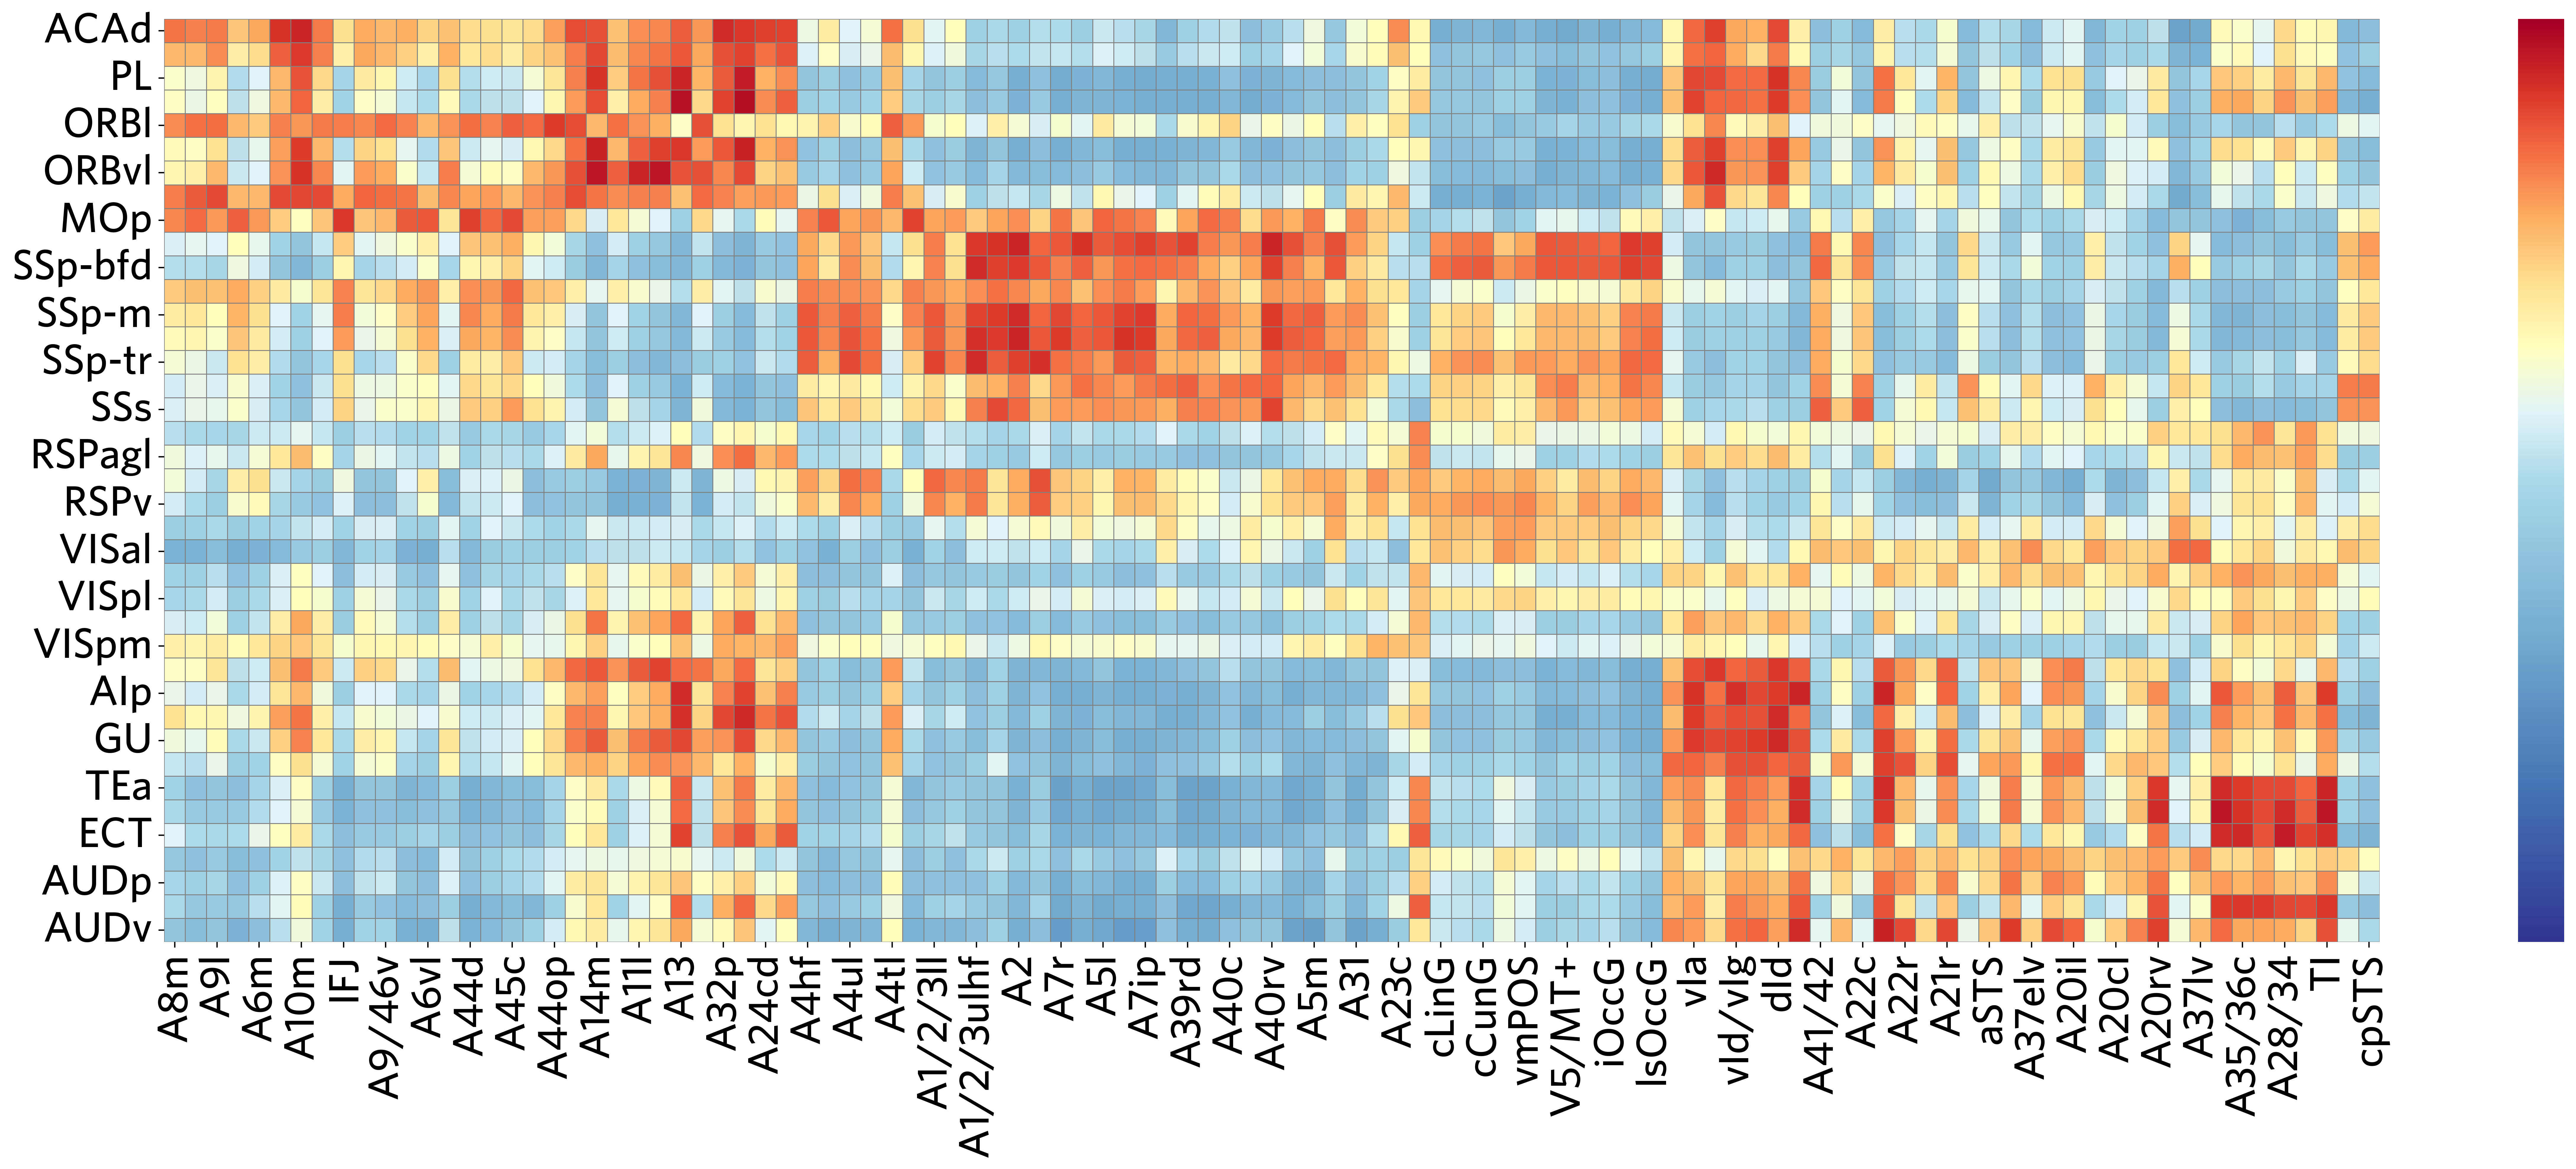

In [16]:
plt.figure(figsize=(25, 10),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(HM_cortical_corr_mean.T,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=False,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,106,2)],rotation=90,fontproperties=custom_font,size=26)
plt.yticks([i+0.5 for i in range(0,39,2)],rotation=0,fontproperties=custom_font,size=26)
plt.tight_layout()

Load cross-species subcortical embeddings

In [17]:
HM_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embeddings_path)):
    human_subcortical_emb = pd.read_csv(os.path.join(path,'Human_SubCortical_Embedding.csv'))
    mouse_subcortical_emb = pd.read_csv(os.path.join(path,'Mouse_SubCortical_Embedding.csv'))
    human_subcortical_emb.set_index('index',inplace = True,drop = True)
    mouse_subcortical_emb.set_index('index',inplace = True ,drop=True)
    corr_ = np.corrcoef(human_subcortical_emb.values,mouse_subcortical_emb.values)[:22,22:]
    HM_subcortical_corr.append(corr_)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:50<00:00, 19.97it/s]


In [18]:
HM_subcortical_corr_mean = pd.DataFrame(np.mean(HM_subcortical_corr,axis=0),index = human_subcortical_emb.index.values,columns = mouse_subcortical_emb.index.values)

Visualizing cross-species subcortical similarity matrix

In [19]:
plt.figure(figsize=(25, 15),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(HM_subcortical_corr_mean.T,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=False,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,22,1)],rotation=90,fontproperties=custom_font,size=36)
plt.yticks([i+0.5 for i in range(0,30,2)],rotation=0,fontproperties=custom_font,size=36)
plt.tight_layout()

## Potential homologous regions' rank of Cross-species Matrix

In [20]:
homo_mouse_region_cortex=['PL','PL','ACAd','ACAv','ACAd','ACAv','ACAd','ACAv','ACAd','ACAv','RSPd','RSPd','RSPv','RSPv','ORBl','ORBl','ORBl','ORBl','ORBm','ORBm','ORBm','ORBm','ORBvl','ORBvl','ORBvl','ORBvl','MOp','MOp','MOp','MOp','SSp-ul',
                   'SSp-m','SSp-ll','SSp-tr','VISp','VISp','VISp','VISp','AId','AIv','AUDp']
homo_human_region_cortex=['A32p','A32sg','A32p','A32p','A32sg','A32sg','A24rv','A24rv','A24cd','A24cd','A23d','A23v','A23d','A23v','A11l','A11m','A12/47o','A12/47l','A11l','A11m','A12/47o','A12/47l','A11l','A11m','A12/47o','A12/47l','A4hf','A4t','A4ul','A4ll','A1/2/3ulhf',
                   'A1/2/3tonIa','A1/2/3ll','A1/2/3tru','cCunG','rCunG','cLinG','rLinG','dIa','vIa','TE1.0 and TE1.2']

In [21]:
homo_mouse_region_subcortex = ['DG','CP','PAL','CA1','SUB','CA2','CA3','ACB','MED']
homo_human_region_subcortex = ['CA4DG','body of caudate','external segment of globus pallidus','CA1','subiculum','CA2CA3','CA2CA3','nucleus accumbens','mPFtha']

In [22]:
def get_homologous_rank(hm_matrix,homo_mouse_region,homo_human_region):
    
    Human_size=hm_matrix.values.shape[0]
    region_info=[]

    for i,j in zip(homo_mouse_region,homo_human_region):
        region_info.append((i,j))

    accuracy_list=[]
    
    for region in region_info:
        
        mouse_region=region[0]
        human_region=region[1]
        dict_={}
        hm_rank_dataframe=pd.DataFrame(hm_matrix[mouse_region].sort_values(ascending=False))
        hm_rank_dataframe['rank']=[i+1 for i in range(Human_size)]
        hm_rank=int(hm_rank_dataframe[hm_rank_dataframe.index==human_region]['rank'].values)
        
        dict_['Region']=(mouse_region,human_region)
        dict_['rank']=hm_rank
        dict_['pearson_r']=hm_rank_dataframe.iloc[hm_rank-1].values
        
        accuracy_list.append(dict_)
        
    return accuracy_list

### Cortical rank

In [23]:
Cortical_rank = get_homologous_rank(HM_cortical_corr_mean,homo_mouse_region_cortex,homo_human_region_cortex)

In [24]:
Cortical_rank

[{'Region': ('PL', 'A32p'),
  'rank': 9,
  'pearson_r': array([0.75398573, 9.        ])},
 {'Region': ('PL', 'A32sg'),
  'rank': 1,
  'pearson_r': array([0.91180233, 1.        ])},
 {'Region': ('ACAd', 'A32p'),
  'rank': 2,
  'pearson_r': array([0.8706069, 2.       ])},
 {'Region': ('ACAv', 'A32p'),
  'rank': 4,
  'pearson_r': array([0.78094884, 4.        ])},
 {'Region': ('ACAd', 'A32sg'),
  'rank': 4,
  'pearson_r': array([0.83724724, 4.        ])},
 {'Region': ('ACAv', 'A32sg'),
  'rank': 2,
  'pearson_r': array([0.81150849, 2.        ])},
 {'Region': ('ACAd', 'A24rv'),
  'rank': 7,
  'pearson_r': array([0.8056086, 7.       ])},
 {'Region': ('ACAv', 'A24rv'),
  'rank': 5,
  'pearson_r': array([0.76905889, 5.        ])},
 {'Region': ('ACAd', 'A24cd'),
  'rank': 6,
  'pearson_r': array([0.81468829, 6.        ])},
 {'Region': ('ACAv', 'A24cd'),
  'rank': 10,
  'pearson_r': array([ 0.69590081, 10.        ])},
 {'Region': ('RSPd', 'A23d'),
  'rank': 7,
  'pearson_r': array([0.63161941, 7

In [25]:
np.mean([i['rank'] for i in Cortical_rank])

9.975609756097562

### Subcortical rank

In [26]:
Subcortical_rank = get_homologous_rank(HM_subcortical_corr_mean,homo_mouse_region_subcortex,homo_human_region_subcortex)

In [27]:
Subcortical_rank

[{'Region': ('DG', 'CA4DG'),
  'rank': 3,
  'pearson_r': array([0.67461594, 3.        ])},
 {'Region': ('CP', 'body of caudate'),
  'rank': 2,
  'pearson_r': array([0.790883, 2.      ])},
 {'Region': ('PAL', 'external segment of globus pallidus'),
  'rank': 3,
  'pearson_r': array([0.7306512, 3.       ])},
 {'Region': ('CA1', 'CA1'),
  'rank': 1,
  'pearson_r': array([0.85968028, 1.        ])},
 {'Region': ('SUB', 'subiculum'),
  'rank': 1,
  'pearson_r': array([0.83943157, 1.        ])},
 {'Region': ('CA2', 'CA2CA3'),
  'rank': 4,
  'pearson_r': array([0.67513007, 4.        ])},
 {'Region': ('CA3', 'CA2CA3'),
  'rank': 4,
  'pearson_r': array([0.778158, 4.      ])},
 {'Region': ('ACB', 'nucleus accumbens'),
  'rank': 1,
  'pearson_r': array([0.78793748, 1.        ])},
 {'Region': ('MED', 'mPFtha'),
  'rank': 1,
  'pearson_r': array([0.84016324, 1.        ])}]

In [28]:
np.mean([i['rank'] for i in Subcortical_rank])

2.2222222222222223

## Gradients of TRembeddings conserved across species

Given the observed cortical correspondence, we next investigate whether humans and mice share conserved transcriptional organizational patterns, as indexed by spatial gradients ([ref1](https://www.nature.com/articles/s41593-018-0195-0) and [ref2](https://www.pnas.org/doi/abs/10.1073/pnas.1814144116)).


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import glob
import os
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
font_path ='../../whitney-medium.otf'
custom_font = FontProperties(fname=font_path)
from nilearn import image,plotting

## Load cortical embeddings

In [3]:
net_embeddings_path = '../../tr_embeddings/FinalModels/MixData_Cortical_Train_Repeat1000/*/*/Results'
net_emd_l = []
net_emd_l_mouse = []

for path in glob.glob(net_embeddings_path):
    net_emd_h_  = pd.read_csv(os.path.join(path, 'Human_Cortical_Embedding.csv'))
    net_emd_h_.set_index('index',inplace=True,drop=True)

    net_emd_m_  = pd.read_csv(os.path.join(path, 'Mouse_Cortical_Embedding.csv'))
    net_emd_m_.set_index('index',inplace=True,drop=True)

    nan_index = np.unique(np.concatenate([np.where(np.isnan(stats.zscore(net_emd_h_, axis=0).values[0, :]))[0], 
                                          np.where(np.isnan(stats.zscore(net_emd_m_, axis=0).values[0, :]))[0]]))
    
    net_emd_l.append(stats.zscore(net_emd_h_, axis=1).values[:, [i for i in range(500) if i not in nan_index]])
    net_emd_l_mouse.append(stats.zscore(net_emd_m_, axis=1).values[:, [i for i in range(500) if i not in nan_index]])

## PCA of Cortical embeddings

Performing principal component analysis (PCA) on transcriptional embeddings to extract gradients

In [4]:
embeddings_human = np.concatenate(net_emd_l, axis=1)
embeddings_mouse = np.concatenate(net_emd_l_mouse, axis=1)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(10)
embeddings_pca = pca.fit_transform(stats.zscore(embeddings_human, axis=0))
embeddings_pca_mouse = pca.transform(stats.zscore(embeddings_mouse, axis=0))
pca.explained_variance_ratio_

array([0.26684668, 0.24915599, 0.16772055, 0.0733473 , 0.05856696,
       0.02690076, 0.01930815, 0.01782193, 0.01446617, 0.01240677])

In [6]:
x = [i for i in range(10)]

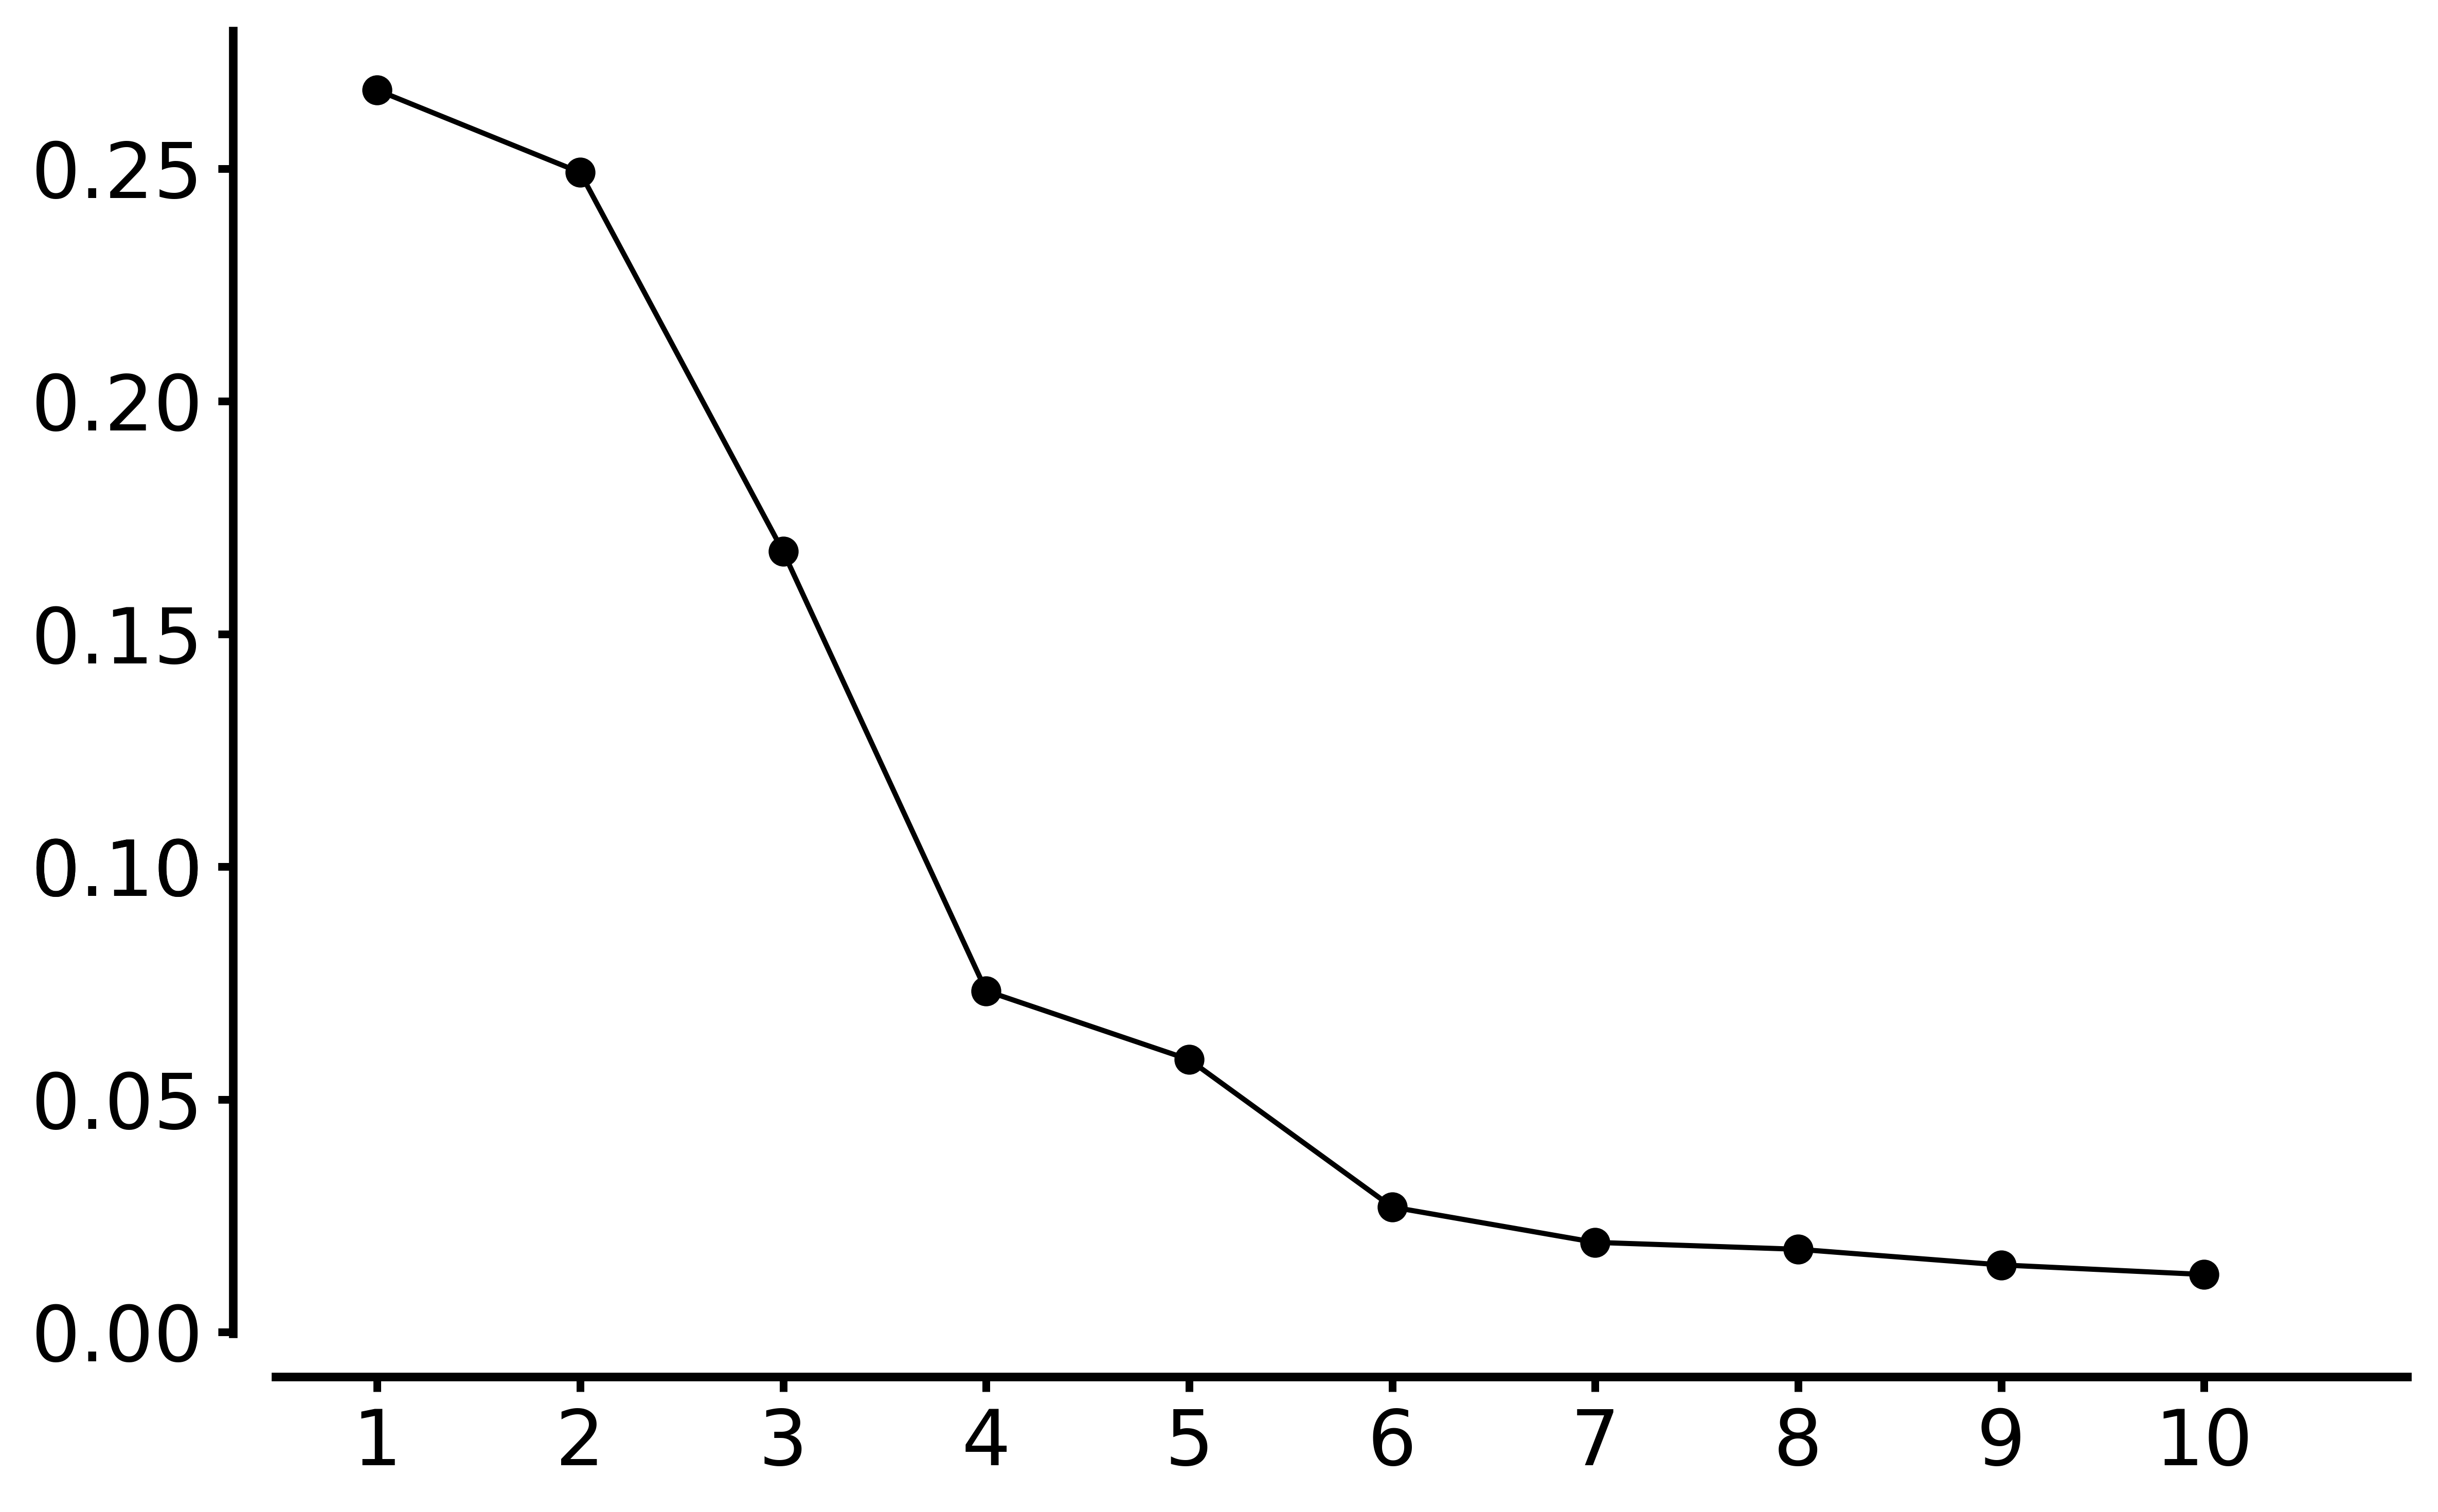

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=600)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(x, pca.explained_variance_ratio_,color='k',linewidth=1.2)
ax.scatter(x,pca.explained_variance_ratio_,color='k')
for spine in ax.spines.values():
    spine.set_position(('outward', 10))

ax.spines['left'].set_linewidth(2.0)  
ax.spines['bottom'].set_linewidth(2.0)  
ax.tick_params(axis='x', labelsize=18, width=1.8)  
ax.tick_params(axis='y', labelsize=18, width=1.8)

ax.set_xlim(-0.5, 10)
ax.set_yticks([0,0.05, 0.1, 0.10, 0.15, 0.20, 0.25])
ax.set_xticks(x, [i+1 for i in range(10)])
plt.tight_layout()

## Visulization

In [8]:
embeddings_pca_h = pd.DataFrame(embeddings_pca,index=net_emd_h_.index.values)
embeddings_pca_h = stats.zscore(embeddings_pca_h,axis=0)

In [9]:
embeddings_pca_m = pd.DataFrame(embeddings_pca_mouse,index=net_emd_m_.index.values)
embeddings_pca_m = stats.zscore(embeddings_pca_m,axis=0)

In [10]:
human_atlas = image.load_img('../../../transbrain/atlas/bn_atlas_2mm_symmetry.nii.gz')
human_atlas_data = np.asarray(human_atlas.dataobj)
human_atlas_excel = pd.read_excel('../../../transbrain/atlas/roi_of_bn_atlas.xlsx')
human_atlas_excel = human_atlas_excel.iloc[:105]

In [11]:
human_g_imgs = []

for n in range(3):
    
    human_g = np.zeros_like(human_atlas_data).astype(np.float32)
    
    for i,row in human_atlas_excel.iterrows():
        human_g[human_atlas_data==row['Atlas Index']] = embeddings_pca_h.iloc[:,n].values[row['Atlas Index']-1]
    
    human_g_img = image.new_img_like(human_atlas,human_g)
    human_g_imgs.append(human_g_img)

### Human Gradient1

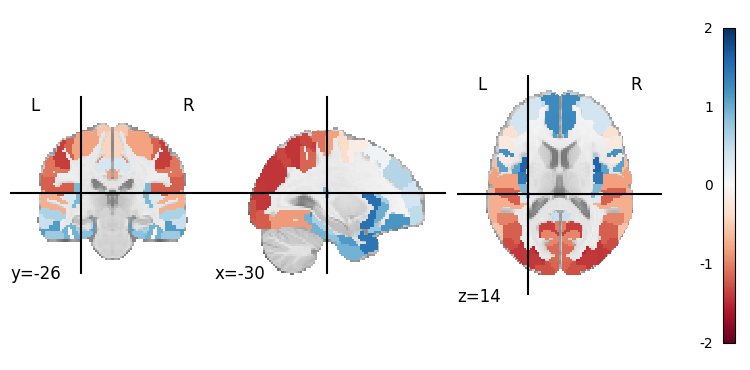

In [12]:
plotting.plot_stat_map(human_g_imgs[0],vmax=2,vmin=-2,cmap='RdBu')

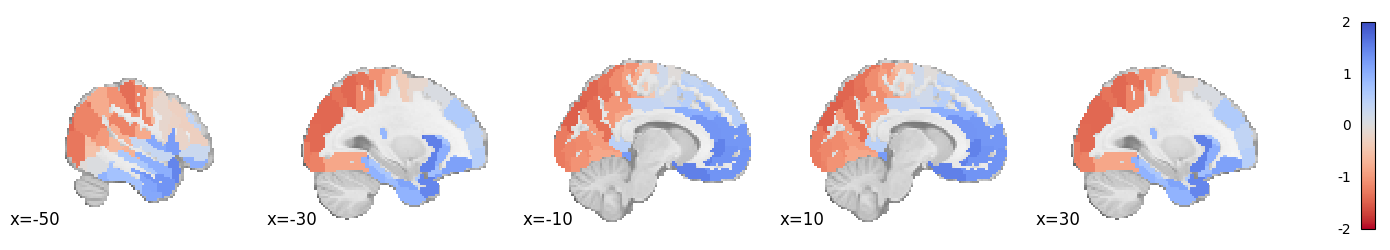

In [13]:
plotting.plot_stat_map(human_g_imgs[0],draw_cross=False,display_mode='x',
                       annotate=True,cut_coords=range(-50,50,20),vmax=2,cmap='coolwarm_r',symmetric_cbar=True)

### Human Gradient2

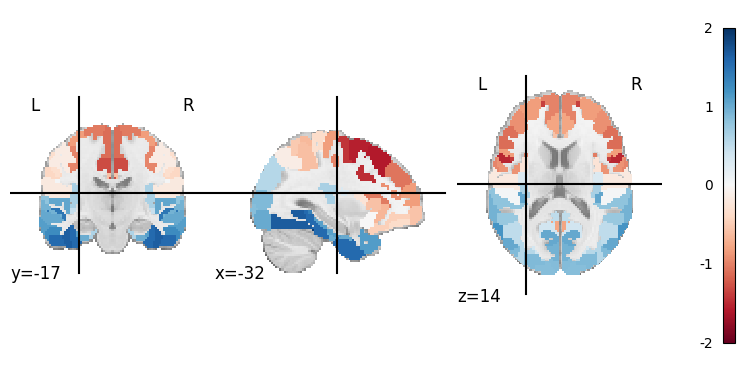

In [14]:
plotting.plot_stat_map(human_g_imgs[1],vmax=2,vmin=-2,cmap='RdBu')

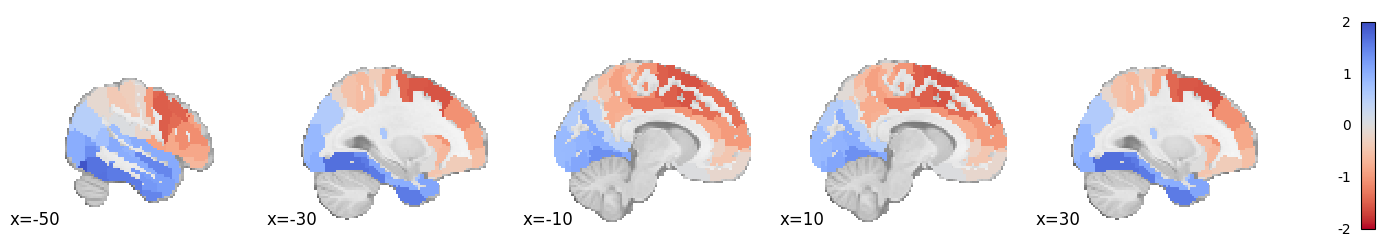

In [15]:
plotting.plot_stat_map(human_g_imgs[1],draw_cross=False,display_mode='x',
                       annotate=True,cut_coords=range(-50,50,20),vmax=2,cmap='coolwarm_r',symmetric_cbar=True)

### Human Gradient3

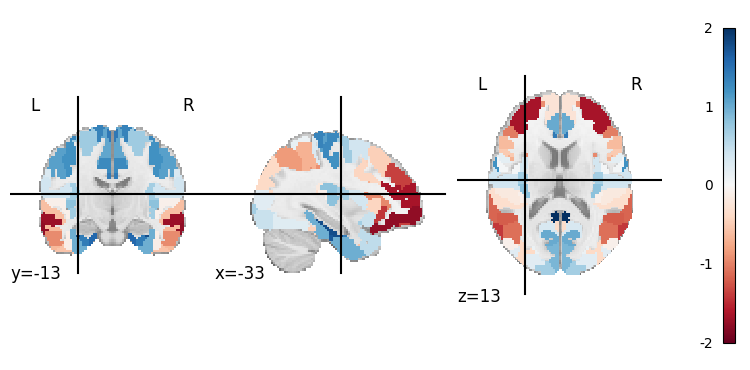

In [16]:
plotting.plot_stat_map(human_g_imgs[2],vmax=2,vmin=-2,cmap='RdBu')

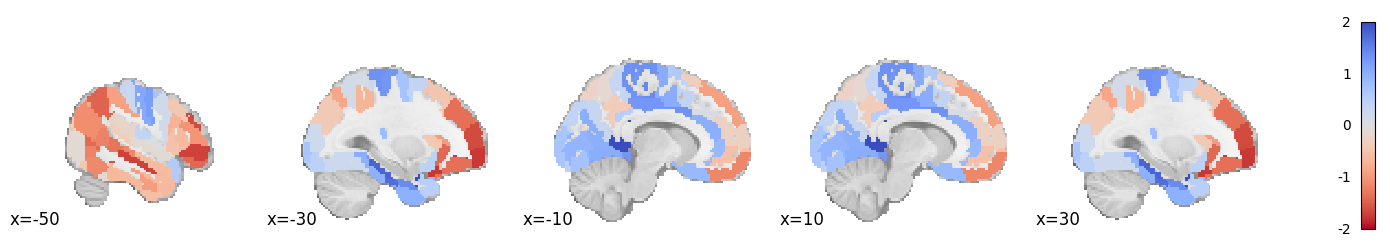

In [17]:
plotting.plot_stat_map(human_g_imgs[2],draw_cross=False,display_mode='x',
                       annotate=True,cut_coords=range(-50,50,20),vmax=2,cmap='coolwarm_r',symmetric_cbar=True)

In [18]:
mouse_atlas = image.load_img('../../../transbrain/atlas/mouse_atlas.nii.gz')
mouse_atlas_data = np.asarray(mouse_atlas.dataobj)

mouse_atlas_excel = pd.read_excel('../../../transbrain/atlas/roi_of_mouse_atlas.xlsx')
mouse_atlas_excel = mouse_atlas_excel.iloc[:39]
mouse_atlas_excel['Atlas Index'] = [i+1 for i in range(39)]

In [19]:
embeddings_pca_m =  embeddings_pca_m.T[mouse_atlas_excel['Anatomical Name'].values].T

In [20]:
mouse_g_imgs = []

for n in range(3):
    
    mouse_g = np.zeros_like(mouse_atlas_data).astype(np.float32)
    
    for i,row in mouse_atlas_excel.iterrows():
        mouse_g[mouse_atlas_data==row['Atlas Index']] = embeddings_pca_m.iloc[:,n].values[row['Atlas Index']-1]
    
    mouse_g_img = image.new_img_like(mouse_atlas,mouse_g)
    mouse_g_imgs.append(mouse_g_img)

In [21]:
Mouse_template = image.load_img('../../../transbrain/atlas/p56_atlas.nii.gz')

### Mouse gradient1

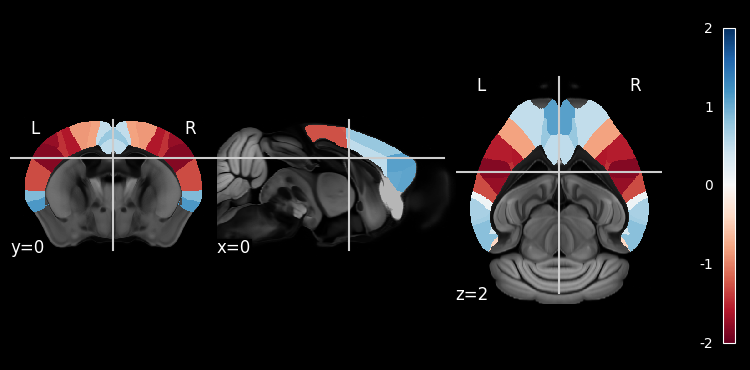

In [22]:
plotting.plot_stat_map(mouse_g_imgs[0],bg_img=Mouse_template,vmax=2,vmin=-2,cmap='RdBu')

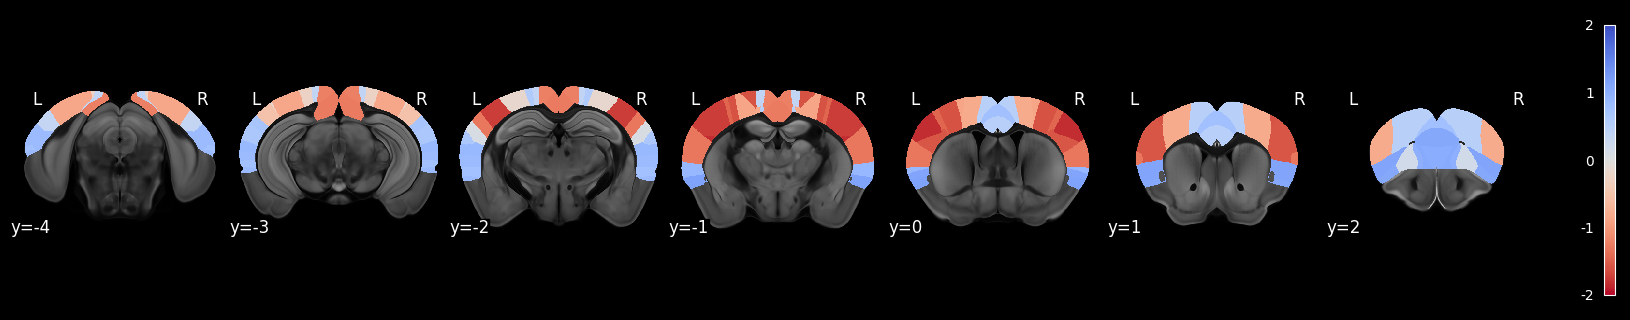

In [23]:
plotting.plot_stat_map(mouse_g_imgs[0],bg_img=Mouse_template,draw_cross=False,display_mode='y',
                       annotate=True,cut_coords=range(-4,3,1),vmax=2,cmap='coolwarm_r',symmetric_cbar=True)

### Mouse gradient2

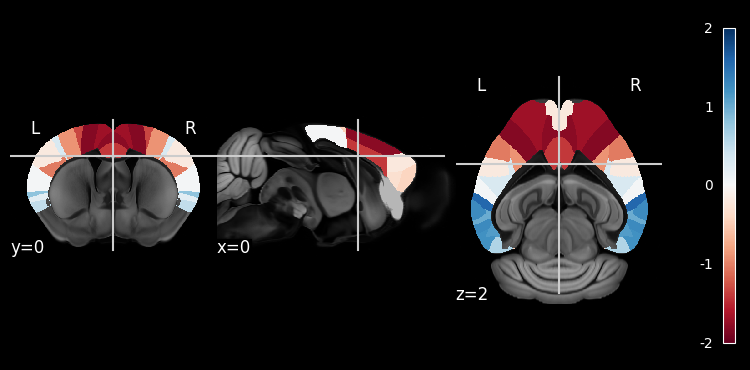

In [24]:
plotting.plot_stat_map(mouse_g_imgs[1],bg_img=Mouse_template,vmax=2,vmin=-2,cmap='RdBu')

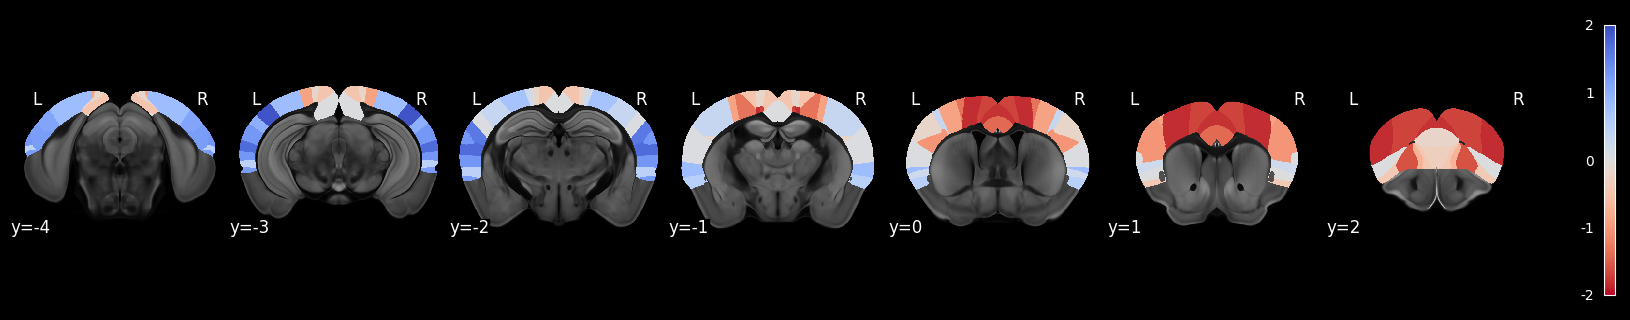

In [25]:
plotting.plot_stat_map(mouse_g_imgs[1],bg_img=Mouse_template,draw_cross=False,display_mode='y',
                       annotate=True,cut_coords=range(-4,3,1),vmax=2,cmap='coolwarm_r',symmetric_cbar=True)

### Mouse gradient3

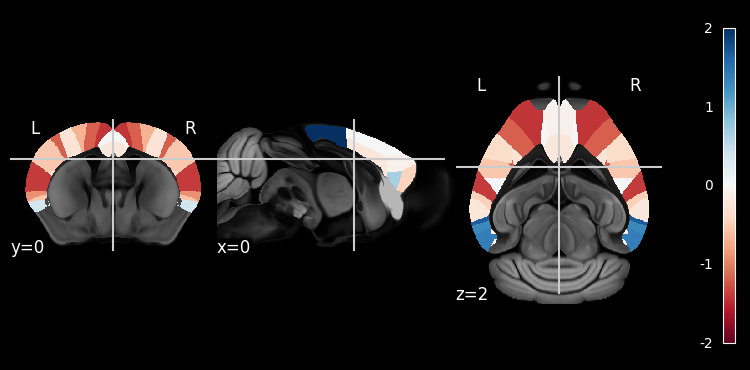

In [26]:
plotting.plot_stat_map(mouse_g_imgs[2],bg_img=Mouse_template,vmax=2,vmin=-2,cmap='RdBu')

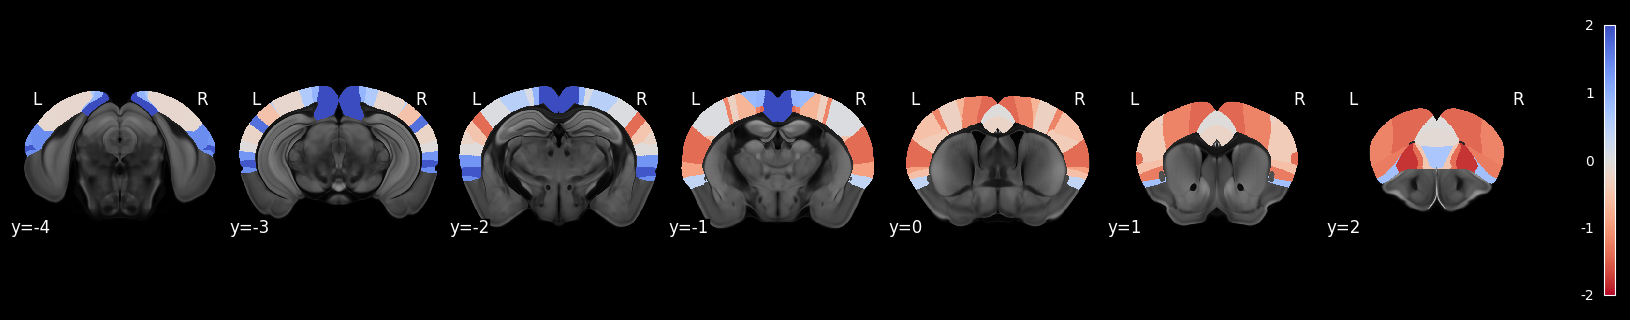

In [27]:
plotting.plot_stat_map(mouse_g_imgs[2],bg_img=Mouse_template,draw_cross=False,display_mode='y',
                       annotate=True,cut_coords=range(-4,3,1),vmax=2,cmap='coolwarm_r',symmetric_cbar=True)